In [276]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
import seaborn as sns
import os

In [277]:
cd

C:\Users\HP


In [278]:
os.chdir('C:\\Users\\HP\\OneDrive\\Documents\\DSBDAL\\Ass 2 Data wrangling II')


In [279]:
df=pd.read_csv('Academic-Performance-Dataset.csv')

In [280]:
df.head()

Rollno      Name Gender Branch  Attendence  Phy_marks  Che_marks  \
0       1  Mohammed      M   Comp        72.0       62.0       98.0   
1       2   Reyansh      M     IT        58.0       62.0       83.0   
2       3     Aarav      M     IT        57.0      -20.0      100.0   
3       4    Atharv      M     IT        60.0       89.0       83.0   
4       5    Vivaan      M   Comp        85.0       90.0        NaN   

   EM1_marks  PPS_marks  SME_marks  Total Marks  Percentage  
0       63.0       89.0       36.0          368        73.6  
1       83.0       88.0       34.0          350        70.0  
2        NaN       56.0       36.0          192        38.4  
3       70.0       33.0       23.0          298        59.6  
4       78.0       23.0       56.0          247        49.4

In [281]:
df.shape

(20, 12)

In [282]:
df.dtypes

Rollno           int64
Name            object
Gender          object
Branch          object
Attendence     float64
Phy_marks      float64
Che_marks      float64
EM1_marks      float64
PPS_marks      float64
SME_marks      float64
Total Marks      int64
Percentage     float64
dtype: object

In [283]:
df.columns

Index(['Rollno', 'Name', 'Gender', 'Branch', 'Attendence', 'Phy_marks',
       'Che_marks', 'EM1_marks', 'PPS_marks', 'SME_marks', 'Total Marks',
       'Percentage'],
      dtype='object')

In [284]:
df.isnull().sum()

Rollno         0
Name           2
Gender         0
Branch         0
Attendence     0
Phy_marks      1
Che_marks      3
EM1_marks      2
PPS_marks      1
SME_marks      0
Total Marks    0
Percentage     0
dtype: int64

In [298]:
# Check for inconsistencies
# For simplicity, let's assume that inconsistent values are those outside a reasonable range.
inconsistent_values = (df[['Attendence', 'Phy_marks', 'Che_marks', 'EM1_marks', 'PPS_marks', 'SME_marks']]
                        .apply(lambda x: (x < 0) | (x > 100)).sum())
print("Inconsistent Values:\n", inconsistent_values)

Inconsistent Values:
 Attendence    0
Phy_marks     0
Che_marks     0
EM1_marks     0
PPS_marks     0
SME_marks     0
dtype: int64


In [285]:
df['Name']=df['Name'].fillna('unknown')

In [286]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median()[0])


In [287]:
df.isnull().sum()

Rollno         0
Name           0
Gender         0
Branch         0
Attendence     0
Phy_marks      0
Che_marks      0
EM1_marks      0
PPS_marks      0
SME_marks      0
Total Marks    0
Percentage     0
dtype: int64

In [288]:
df.isna().sum()

Rollno         0
Name           0
Gender         0
Branch         0
Attendence     0
Phy_marks      0
Che_marks      0
EM1_marks      0
PPS_marks      0
SME_marks      0
Total Marks    0
Percentage     0
dtype: int64

In [289]:
df['Total Marks']=df['Phy_marks']+df['Che_marks']+df['EM1_marks']+df['PPS_marks']+df['SME_marks']
df['Percentage']=df['Total Marks']/5

df

Rollno       Name Gender Branch  Attendence  Phy_marks  Che_marks  \
0        1   Mohammed      M   Comp        72.0       62.0       98.0   
1        2    Reyansh      M     IT        58.0       62.0       83.0   
2        3      Aarav      M     IT        57.0      -20.0      100.0   
3        4     Atharv      M     IT        60.0       89.0       83.0   
4        5     Vivaan      M   Comp        85.0       90.0       10.5   
5        6      Advik      M   ENTC        94.0       99.0       84.0   
6        7       Ansh      M   ENTC        98.0       88.0       95.0   
7        8     Ishaan      M   ENTC        75.0       66.0       51.0   
8        9      Dhruv      M   ENTC        63.0       10.5       10.5   
9       10  Siddharth      M   ENTC        96.0       67.0       78.0   
10      11     Vihaan      M   ENTC        82.0       54.0       70.0   
11      12    unknown      M     IT        75.0       64.0       67.0   
12      13     Aarush      M     IT        67.0       56.0       81.0   
13      14        Leo      M     IT        98.0      -34.0       70.0   
14      15     Maryam      F     IT        64.0       87.0       60.0   
15      16     Saanvi      F   Comp        66.0       90.0       95.0   
16      17    Zaranew      F   Comp        93.0       54.0       10.5   
17      18      Inaya      F   Comp        74.0       67.0       93.0   
18      19      Aarya      F   Comp        72.0       88.0       84.0   
19      20    unknown      F   Comp        53.0       76.0       81.0   

    EM1_marks  PPS_marks  SME_marks  Total Marks  Percentage  
0        63.0       89.0       36.0        348.0        69.6  
1        83.0       88.0       34.0        350.0        70.0  
2        10.5       56.0       36.0        182.5        36.5  
3        70.0       33.0       23.0        298.0        59.6  
4        78.0       23.0       56.0        257.5        51.5  
5       100.0       56.0       99.0        438.0        87.6  
6        81.0       78.0       78.0        420.0        84.0  
7        83.0      -99.0       76.0        177.0        35.4  
8        97.0       56.0       55.0        229.0        45.8  
9        95.0       10.5       98.0        348.5        69.7  
10       88.0       55.0       56.0        323.0        64.6  
11       71.0       66.0       87.0        355.0        71.0  
12       10.5       90.0       55.0        292.5        58.5  
13       94.0       77.0       66.0        273.0        54.6  
14       90.0       65.0       90.0        392.0        78.4  
15       67.0       99.0       77.0        428.0        85.6  
16       75.0       90.0       65.0        294.5        58.9  
17       93.0       87.0       99.0        439.0        87.8  
18       81.0       80.0       45.0        378.0        75.6  
19       93.0       65.0       23.0        338.0        67.6

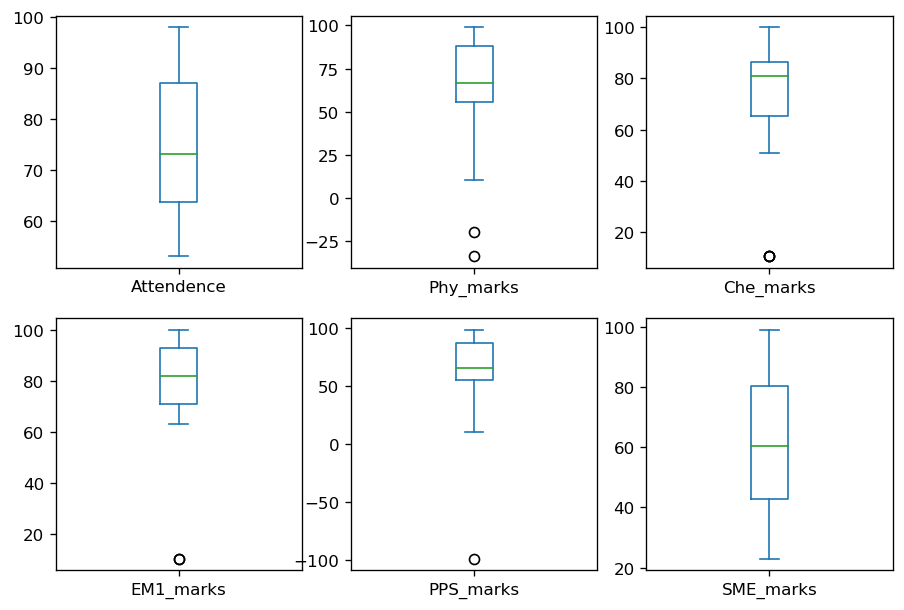

In [290]:
#boxplot
plt.rcParams["figure.figsize"]=(9,6)
df_list=['Attendence', 'Phy_marks', 'Che_marks', 'EM1_marks', 'PPS_marks', 'SME_marks']
fig, axes=plt.subplots(2,3)
fig.set_dpi(120)

count=0
for r in range(2):
    for c in range(3):
        _=df[df_list[count]].plot(kind='box', ax=axes[r,c])
        count+=1

In [291]:
# Calculate IQR for each numeric variable
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers detection
threshold = 1.5

# Identify outliers
outliers = ((df[numeric_columns] < (Q1 - threshold * IQR)) | (df[numeric_columns] > (Q3 + threshold * IQR)))

# Display outliers
print("Outliers:")
print(outliers)


Outliers:
    Attendence  Phy_marks  Che_marks  EM1_marks  PPS_marks  SME_marks
0        False      False      False      False      False      False
1        False      False      False      False      False      False
2        False       True      False       True      False      False
3        False      False      False      False      False      False
4        False      False       True      False      False      False
5        False      False      False      False      False      False
6        False      False      False      False      False      False
7        False      False      False      False       True      False
8        False      False       True      False      False      False
9        False      False      False      False      False      False
10       False      False      False      False      False      False
11       False      False      False      False      False      False
12       False      False      False       True      False      False
13       F

In [292]:
# For simplicity, let's assume we're just identifying outliers using the IQR method.

def remove_outliers(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df[col] = df[col].apply(lambda x: None if x < lower_bound or x > upper_bound else x)
    return df

# Remove outliers
numeric_columns = ['Attendence', 'Phy_marks', 'Che_marks', 'EM1_marks', 'PPS_marks', 'SME_marks']
df = remove_outliers(df, numeric_columns)

In [293]:
# Calculate IQR for each numeric variable
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers detection
threshold = 1.5

# Identify outliers
outliers = ((df[numeric_columns] < (Q1 - threshold * IQR)) | (df[numeric_columns] > (Q3 + threshold * IQR)))

# Display outliers
print("Outliers:")
print(outliers)


Outliers:
    Attendence  Phy_marks  Che_marks  EM1_marks  PPS_marks  SME_marks
0        False      False      False      False      False      False
1        False      False      False      False      False      False
2        False      False      False      False      False      False
3        False      False      False      False      False      False
4        False      False      False      False      False      False
5        False      False      False      False      False      False
6        False      False      False      False      False      False
7        False      False      False      False      False      False
8        False       True      False      False      False      False
9        False      False      False      False      False      False
10       False      False      False      False      False      False
11       False      False      False      False      False      False
12       False      False      False      False      False      False
13       F

In [294]:
Q1=df['Che_marks'].quantile(0.25)
Q3=df['Che_marks'].quantile(0.75)
IQR=Q3-Q1

Lower_limit=Q1-1.5*IQR
Upper_limit=Q3+1.5*IQR

print(f'Q1={Q1}, Q3={Q3}, IQR={IQR},Lower_limit={Lower_limit},Upper_limit={Upper_limit}')

Q1=70.0, Q3=93.0, IQR=23.0,Lower_limit=35.5,Upper_limit=127.5


In [295]:
df[(df['Che_marks'] < Lower_limit) | (df['Che_marks'] > Upper_limit)]

Empty DataFrame
Columns: [Rollno, Name, Gender, Branch, Attendence, Phy_marks, Che_marks, EM1_marks, PPS_marks, SME_marks, Total Marks, Percentage]
Index: []

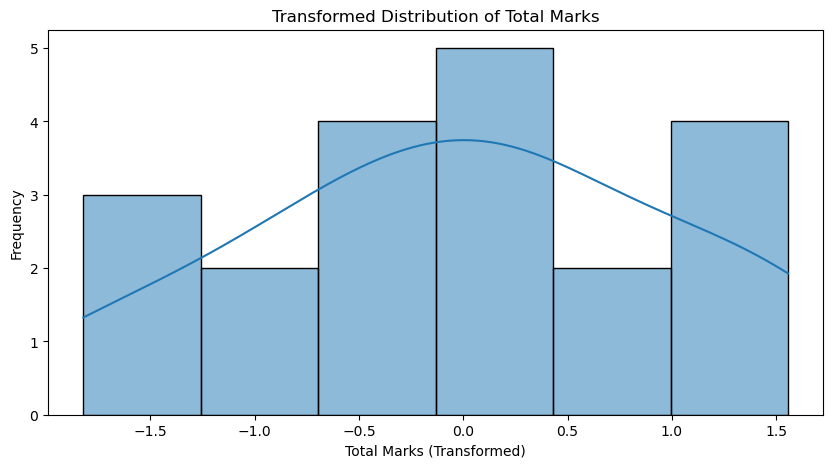

In [296]:
# Step 3: Data Transformations
# Apply Box-Cox transformation to one numeric variable
transformer = PowerTransformer(method='box-cox')
variable_to_transform = 'Total Marks'  # Adjust this variable name based on your dataset
df[variable_to_transform] = transformer.fit_transform(df[[variable_to_transform]])

# Visualize the transformed distribution
plt.figure(figsize=(10, 5))
sns.histplot(df[variable_to_transform], kde=True)
plt.title("Transformed Distribution of Total Marks")
plt.xlabel("Total Marks (Transformed)")
plt.ylabel("Frequency")
plt.show()

In [299]:
df['Percentage_log'] = np.log1p(df['Percentage'])

In [300]:
df

Rollno       Name Gender Branch  Attendence  Phy_marks  Che_marks  \
0        1   Mohammed      M   Comp        72.0       62.0       98.0   
1        2    Reyansh      M     IT        58.0       62.0       83.0   
2        3      Aarav      M     IT        57.0        NaN      100.0   
3        4     Atharv      M     IT        60.0       89.0       83.0   
4        5     Vivaan      M   Comp        85.0       90.0        NaN   
5        6      Advik      M   ENTC        94.0       99.0       84.0   
6        7       Ansh      M   ENTC        98.0       88.0       95.0   
7        8     Ishaan      M   ENTC        75.0       66.0       51.0   
8        9      Dhruv      M   ENTC        63.0       10.5        NaN   
9       10  Siddharth      M   ENTC        96.0       67.0       78.0   
10      11     Vihaan      M   ENTC        82.0       54.0       70.0   
11      12    unknown      M     IT        75.0       64.0       67.0   
12      13     Aarush      M     IT        67.0       56.0       81.0   
13      14        Leo      M     IT        98.0        NaN       70.0   
14      15     Maryam      F     IT        64.0       87.0       60.0   
15      16     Saanvi      F   Comp        66.0       90.0       95.0   
16      17    Zaranew      F   Comp        93.0       54.0        NaN   
17      18      Inaya      F   Comp        74.0       67.0       93.0   
18      19      Aarya      F   Comp        72.0       88.0       84.0   
19      20    unknown      F   Comp        53.0       76.0       81.0   

    EM1_marks  PPS_marks  SME_marks  Total Marks  Percentage  Percentage_log  
0        63.0       89.0       36.0     0.205720        69.6        4.257030  
1        83.0       88.0       34.0     0.233529        70.0        4.262680  
2         NaN       56.0       36.0    -1.767595        36.5        3.624341  
3        70.0       33.0       23.0    -0.460600        59.6        4.104295  
4        78.0       23.0       56.0    -0.957699        51.5        3.960813  
5       100.0       56.0       99.0     1.540078        87.6        4.484132  
6        81.0       78.0       78.0     1.259998        84.0        4.442651  
7        83.0        NaN       76.0    -1.820855        35.4        3.594569  
8        97.0       56.0       55.0    -1.283133        45.8        3.845883  
9        95.0       10.5       98.0     0.212664        69.7        4.258446  
10       88.0       55.0       56.0    -0.134473        64.6        4.183576  
11       71.0       66.0       87.0     0.303430        71.0        4.276666  
12        NaN       90.0       55.0    -0.530409        58.5        4.085976  
13       94.0       77.0       66.0    -0.772134        54.6        4.018183  
14       90.0       65.0       90.0     0.837224        78.4        4.374498  
15       67.0       99.0       77.0     1.383687        85.6        4.461300  
16       75.0       90.0       65.0    -0.505106        58.9        4.092677  
17       93.0       87.0       99.0     1.555826        87.8        4.486387  
18       81.0       80.0       45.0     0.631863        75.6        4.338597  
19       93.0       65.0       23.0     0.067986        67.6        4.228293